In [3]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

In [4]:
# Carregar a imagem da CNH
imagem = cv2.imread("../arq/CNH_Aberta/00003638_in.jpg")

# Converter para escala de cinza
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Aplicar um filtro Gaussiano para suavizar ruídos
imagem_suavizada = cv2.GaussianBlur(imagem_cinza, (5, 5), 0)

# Aplicar threshold para segmentar o texto do fundo
_, imagem_binaria = cv2.threshold(imagem_suavizada, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [5]:
# Encontrar contornos na imagem binarizada
contornos, _ = cv2.findContours(imagem_binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [6]:
contornos

(array([[[  0,   0]],
 
        [[  0, 548]],
 
        [[107, 548]],
 
        [[108, 547]],
 
        [[109, 548]],
 
        [[862, 548]],
 
        [[862,   0]]], dtype=int32),)

In [7]:
# Criar uma máscara preta do mesmo tamanho da imagem
mascara = np.zeros_like(imagem, dtype=np.uint8)

Texto extraído:
 


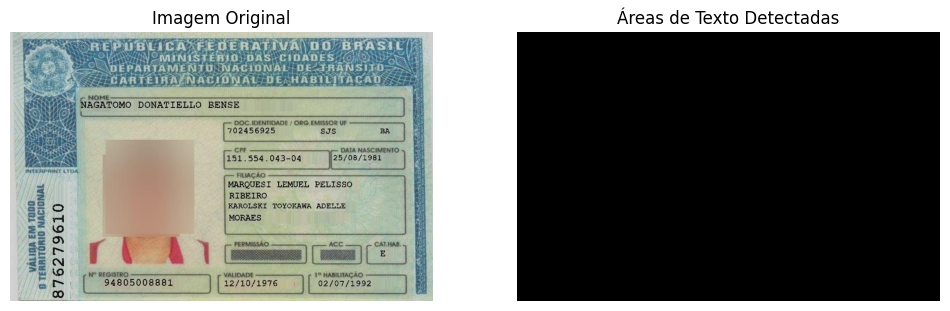

In [2]:


# Filtrar contornos para capturar apenas as áreas de texto
areas_texto = []
altura_min, largura_min = 15, 50  # Define um tamanho mínimo para evitar ruído
altura_max, largura_max = 100, 600  # Define um tamanho máximo para evitar áreas indesejadas

for contorno in contornos:
    x, y, w, h = cv2.boundingRect(contorno)
    if altura_min < h < altura_max and largura_min < w < largura_max:  # Filtra áreas de texto
        areas_texto.append((x, y, x + w, y + h))
        cv2.rectangle(mascara, (x, y), (x + w, y + h), (255, 255, 255), -1)  # Marca na máscara

# Aplicar a máscara à imagem original
imagem_mascarada = cv2.bitwise_and(imagem, mascara)

# Converter para escala de cinza
imagem_cinza = cv2.cvtColor(imagem_mascarada, cv2.COLOR_BGR2GRAY)

# Aplicar OCR na imagem mascarada
texto = pytesseract.image_to_string(imagem_cinza, lang='por')

# Exibir resultado do OCR
print("Texto extraído:\n", texto)

# Mostrar imagem original e máscara com áreas identificadas
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
axs[0].set_title("Imagem Original")
axs[0].axis("off")

axs[1].imshow(mascara, cmap="gray")
axs[1].set_title("Áreas de Texto Detectadas")
axs[1].axis("off")

plt.show()
